In [1]:
#Importing some neccessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve,auc

import warnings
warnings.filterwarnings('ignore')

In [2]:
 #reading WA_Fn-UseC_-HR-Employee-Attrition.csv file
data=pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
#Looking into top 5 rows
data.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

In [3]:
#Looking for  max rows
pd.set_option('display.max.rows',None)

In [4]:
# Check Column name:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [5]:
# Checking  total number columns and rows
data.shape

(1470, 35)

In [6]:
#we see that dataset as 1470 rows and 35 columns

In [7]:
#removing duplicate values
data.drop_duplicates(inplace=True)

In [8]:
# Checking after removing duplicates
data.shape

(1470, 35)

In [9]:
# There is no duplicate value in our dataset

In [10]:
#Checking the datatype of each variables
data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [11]:
# Checking Null values of each attributes
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [12]:
#we have int64(26), object(9) datatype

In [13]:
# we see that there is no null value in dataset.

In [14]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [15]:
# Checking missing values of each attributes
data.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

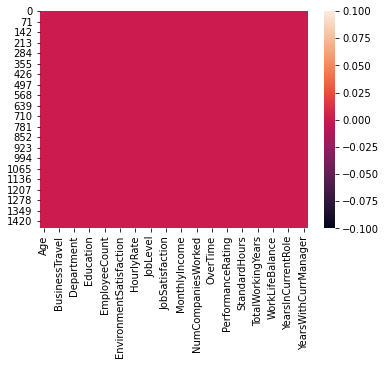

In [16]:
#Looking for null values if any, in heatmap
sns.heatmap(data.isna())
plt.show()

In [17]:
#we see throw visualization there is no missing value in any variable

In [18]:
#Checking Statistics summary of dataset
data.describe()

Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335                 1.093082    20.329428        0.711561   
min          1.000000                 1.000000    30.000000        1.000000   
25%        491.250000                 2.000000    48.000000        2.000000   
50%       1020.500000                 3.000000    66.000000        3.000000   
75%       1555.750000                 4.000000    83.750000        3.000000   
max       2068.000000                 4.000000   100.000000        4.000000   

          JobLevel  ...  RelationshipSatisfaction  StandardHours  \
count  1470.000000  ...               1470.000000         1470.0   
mean      2.063946  ...                  2.712245           80.0   
std       1.106940  ...                  1.081209            0.0   
min       1.000000  ...                  1.000000           80.0   
25%       1.000000  ...                  2.000000           80.0   
50%       2.000000  ...                  3.000000           80.0   
75%       3.000000  ...                  4.000000           80.0   
max       5.000000  ...                  4.000000           80.0   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
count       1470.000000        1470.000000            1470.000000   
mean           0.793878          11.279592               2.799320   
std            0.852077           7.780782               1.289271   
min            0.000000           0.000000               0.000000   
25%            0.000000           6.000000               2.000000   
50%            1.000000          10.000000               3.000000   
75%            1.000000          15.000000               3.000000   
max            3.000000          40.000000               6.000000   

       WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
count      1470.000000     1470.000000         1470.000000   
mean          2.761224        7.008163            4.229252   
std           0.706476        6.126525            3.623137   
min           1.000000        0.000000            0.000000   
25%           2.000000        3.000000            2.000000   
50%           3.000000        5.000000            3.000000   
75%           3.000000        9.000000            7.000000   
max           4.000000       40.000000           18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  
count              1470.000000           1470.000000  
mean                  2.187755              4.123129  
std                   3.222430              3.568136  
min                   0.000000              0.000000  
25%                   0.000000              2.000000  
50%                   1.000000              3.000000  
75%                   3.000000              7.000000  
max                  15.000000             17.000000  

[8 rows x 26 columns]

In [19]:
#Few columns have very low values in it, where few have very high values. Hence Scaling will be required to train our model

In [20]:
print('No-Attrition : 0  ----------', data.Attrition.value_counts()[0])
print('Attrition : 1 -------------', data.Attrition.value_counts()[1])

No-Attrition : 0  ---------- 1233
Attrition : 1 ------------- 237


In [21]:
#we observed that data is imbalance

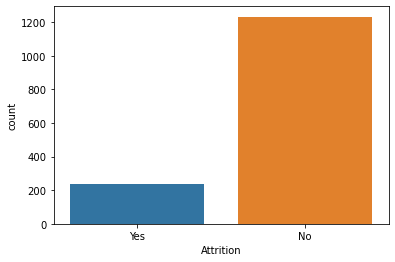

In [22]:
sns.countplot(data['Attrition'])
plt.show()

In [23]:
#We observed that the number of Attrition is very less compared to the No-Attrition

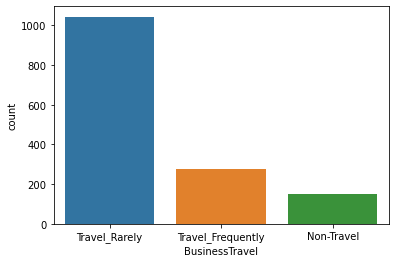

In [24]:
sns.countplot(data["BusinessTravel"])
plt.show()

In [25]:
data["BusinessTravel"].value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

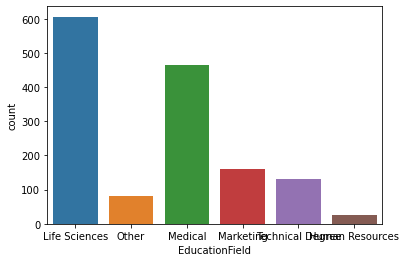

In [26]:
sns.countplot(data["EducationField"])
plt.show()

In [27]:
data["EducationField"].value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

In [28]:
data["Department"].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

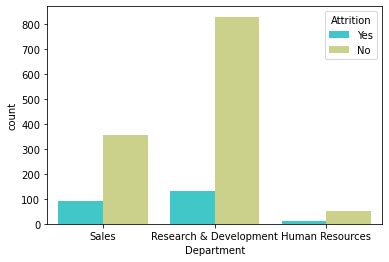

In [29]:
sns.countplot(x='Department',hue = 'Attrition', data=data, palette='rainbow')
plt.show()

In [30]:
#we see that hr have less attrition compare to sales as less attrition compare to Research & development department.

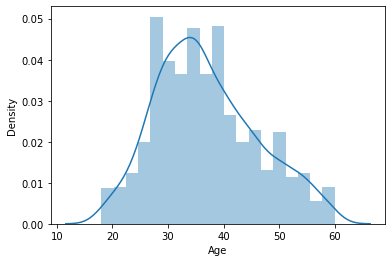

In [31]:
sns.distplot(data['Age'])
plt.show()

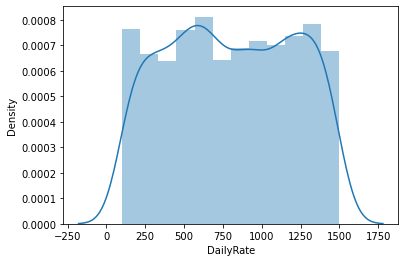

In [32]:
sns.distplot(data['DailyRate'])
plt.show()

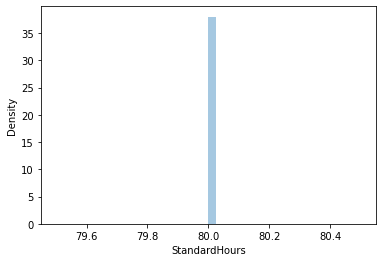

In [33]:
sns.distplot(data['StandardHours'])
plt.show()

In [34]:
data['StandardHours'].unique()

array([80], dtype=int64)

In [35]:
data['StandardHours'].value_counts()

80    1470
Name: StandardHours, dtype: int64

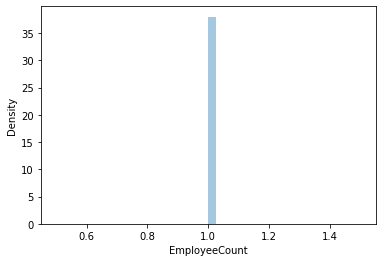

In [36]:
sns.distplot(data['EmployeeCount'])
plt.show()

In [37]:
data['EmployeeCount'].value_counts()

1    1470
Name: EmployeeCount, dtype: int64

In [38]:
data['Over18'].value_counts()

Y    1470
Name: Over18, dtype: int64

In [39]:
# droping the column from dataset 
data.drop(['StandardHours','EmployeeCount','Over18'],axis=1,inplace=True)

In [40]:
# Features EmployeeCount, Over18, & StandardHours has a single value in the dataset and not contributing, so we can drop these three columns

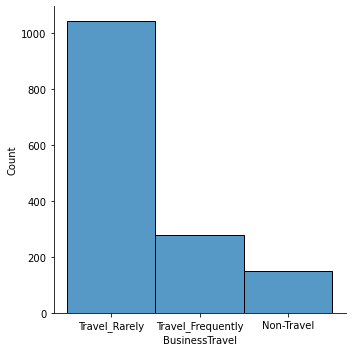

In [41]:
sns.displot(data['BusinessTravel'])
plt.show()

In [42]:
#we see that BusinessTravel is three class travle_rarely, Travel_frequently, non travel

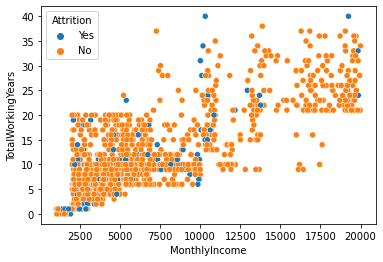

In [43]:
sns.scatterplot(x= data['MonthlyIncome'], y = data['TotalWorkingYears'], hue = data['Attrition'])
plt.show()

In [44]:
#we see that employee with monthly income between ( 2500-10000)has high attrition rate, or people with highets monthley salary 20000 also has attrition rate.

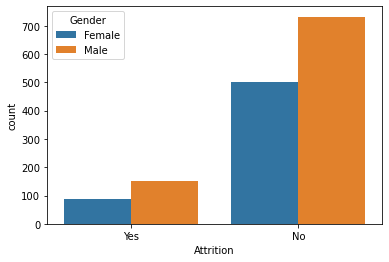

In [45]:
sns.countplot(x= data['Attrition'], hue = data['Gender'],data = data)
plt.show()

In [46]:
# we see that Attrtion rate in male is higher than female

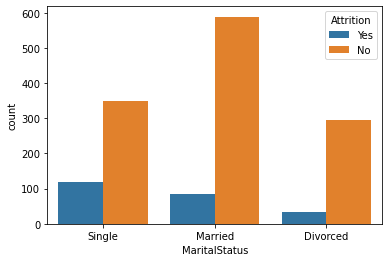

In [47]:
sns.countplot(x = data['MaritalStatus'],hue=data['Attrition'] , data = data)
plt.show()

In [48]:
#we see that Attrtion rate is higher in single.

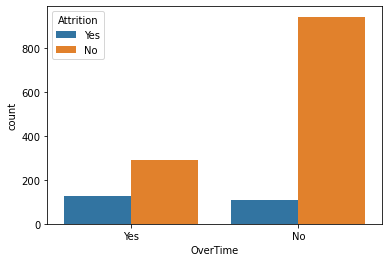

In [49]:
sns.countplot(x = data['OverTime'],hue=data['Attrition'] , data = data)
plt.show()

In [50]:
# we see that employees who are doing overtime has higher attrition rate

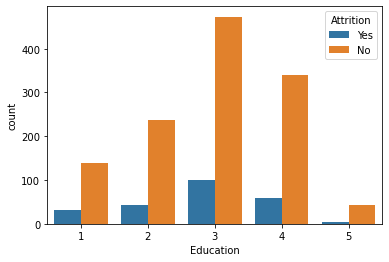

In [51]:
sns.countplot(x = data['Education'],hue=data['Attrition'] , data = data)
plt.show()

In [52]:
# We can see Employee Attrition rate is high for Below College & Bachelor degree

In [53]:
#Filter categorical features
numerics=['int8','int16','int32','int64','float16','float32','float64']
categorical_columns=[]
features=data.columns.values.tolist()
for col in features:
    if data[col].dtype in numerics:
        continue
    categorical_columns.append(col)

In [54]:
categorical_columns

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

In [55]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for columns in data.columns:
    data["Attrition"]=le.fit_transform(data["Attrition"])
    data["BusinessTravel"]=le.fit_transform(data["BusinessTravel"])
    data["Department"]=le.fit_transform(data["Department"])
    data["EducationField"]=le.fit_transform(data["EducationField"])
    data["Gender"]=le.fit_transform(data["Gender"])
    data["JobRole"]=le.fit_transform(data["JobRole"])
    data["MaritalStatus"]=le.fit_transform(data["MaritalStatus"])
    data["OverTime"]=le.fit_transform(data["OverTime"])

In [56]:
data.head()

Age  Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0   41          1               2       1102           2                 1   
1   49          0               1        279           1                 8   
2   37          1               2       1373           1                 2   
3   33          0               1       1392           1                 3   
4   27          0               2        591           1                 2   

   Education  EducationField  EmployeeNumber  EnvironmentSatisfaction  ...  \
0          2               1               1                        2  ...   
1          1               1               2                        3  ...   
2          2               4               4                        4  ...   
3          4               1               5                        4  ...   
4          1               3               7                        1  ...   

   PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0                  3                         1                 0   
1                  4                         4                 1   
2                  3                         2                 0   
3                  3                         3                 0   
4                  3                         4                 1   

   TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
0                  8                      0                1               6   
1                 10                      3                3              10   
2                  7                      3                3               0   
3                  8                      3                3               8   
4                  6                      3                3               2   

   YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                   4                        0                     5  
1                   7                        1                     7  
2                   0                        0                     0  
3                   7                        3                     0  
4                   2                        2                     2  

[5 rows x 32 columns]

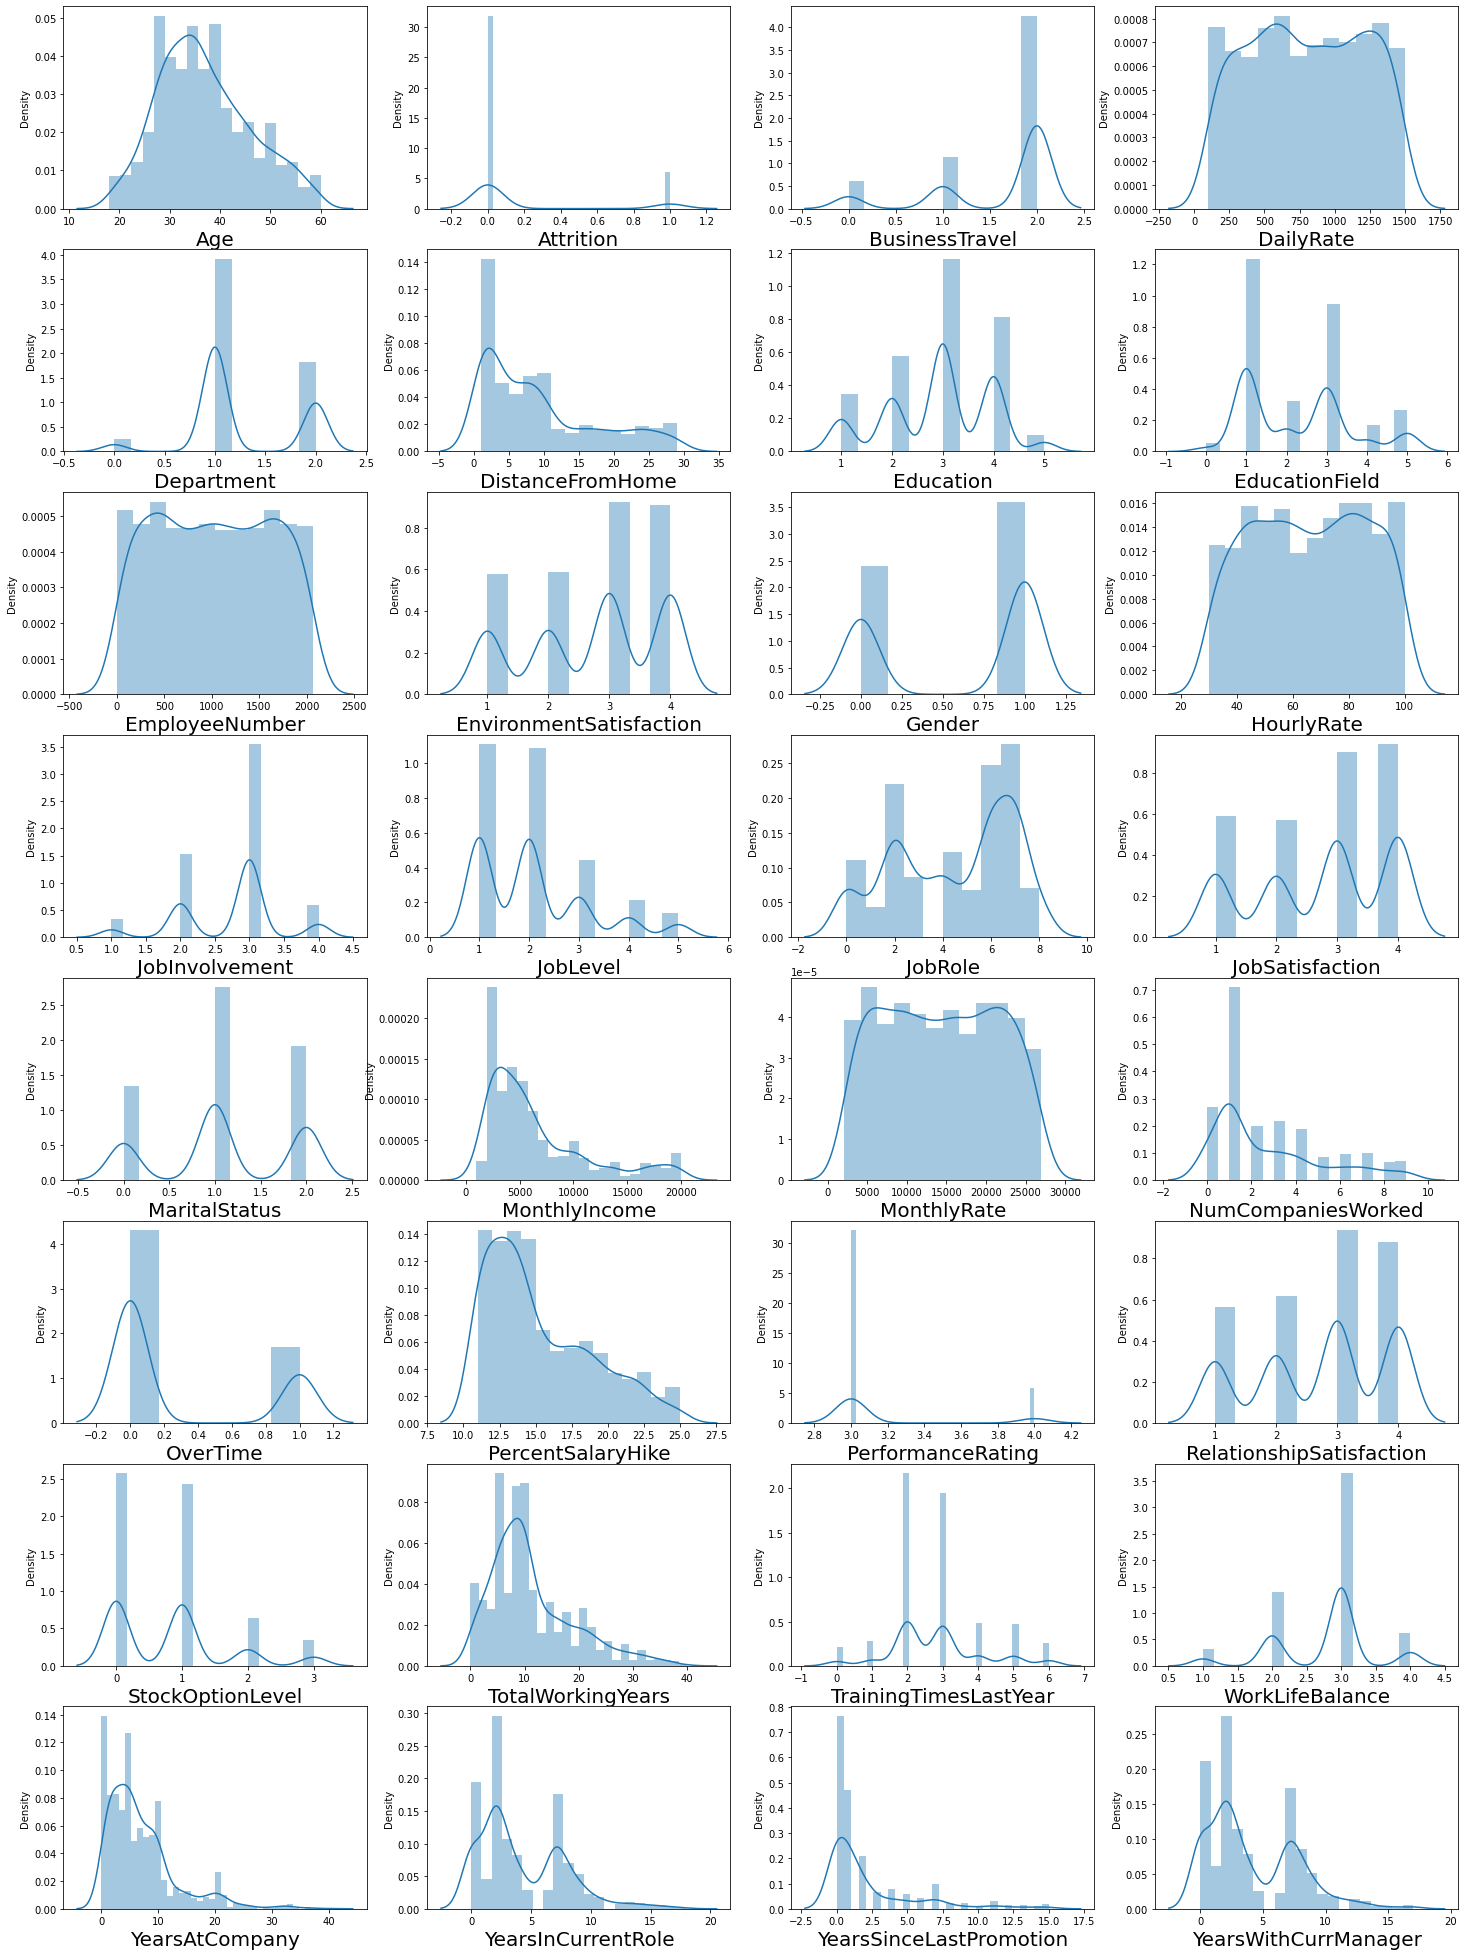

In [57]:
# let's see how data is distributed for every column
plt.figure(figsize=(25,35), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=32 :     # as there are 32 columns in the data
        ax = plt.subplot(8,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [58]:
#Here we can see almost all the data is Normalized and there is no much outliers present in the dataset

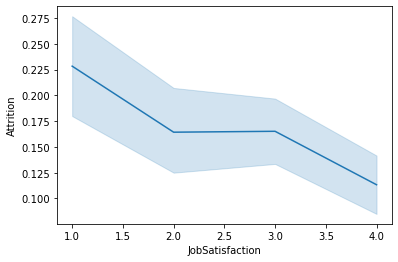

In [59]:
sns.lineplot(x="JobSatisfaction",y="Attrition",data=data)
plt.show()

In [60]:
#we see that Attrition rate of poor work life balance is high, however attrition rate of Best worklife balance is higher than Good worklife balance

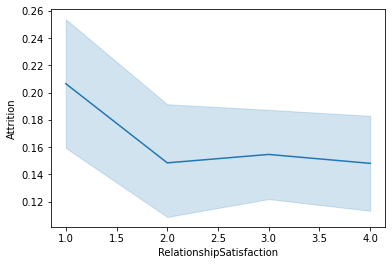

In [61]:
sns.lineplot(x="RelationshipSatisfaction",y="Attrition",data=data)
plt.show()

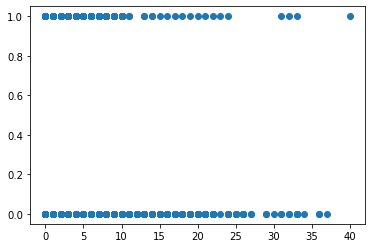

In [62]:
plt.scatter(x="YearsAtCompany",y="Attrition",data=data)
plt.show()

In [63]:
#People have less experience,  employees with experience within 20-25 and employees with experience within 30-35 has a higher attrition rate

<function matplotlib.pyplot.show(close=None, block=None)>

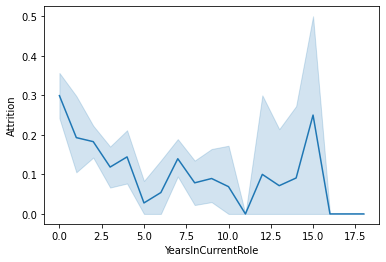

In [64]:
sns.lineplot(x="YearsInCurrentRole",y="Attrition",data=data)
plt.show

<AxesSubplot:xlabel='YearsWithCurrManager', ylabel='Attrition'>

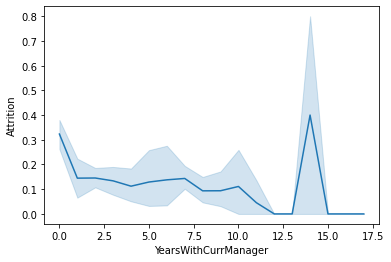

In [65]:
sns.lineplot(x="YearsWithCurrManager",y="Attrition",data=data)


In [66]:
# for empy no of years with the current manager which ranges from 12-15 yrs can make them to leave the compny for a better job role.

In [67]:
#Checking Correlation
data.corr()

Age  Attrition  BusinessTravel  DailyRate  \
Age                       1.000000  -0.159205        0.024751   0.010661   
Attrition                -0.159205   1.000000        0.000074  -0.056652   
BusinessTravel            0.024751   0.000074        1.000000  -0.004086   
DailyRate                 0.010661  -0.056652       -0.004086   1.000000   
Department               -0.031882   0.063991       -0.009044   0.007109   
DistanceFromHome         -0.001686   0.077924       -0.024469  -0.004985   
Education                 0.208034  -0.031373        0.000757  -0.016806   
EducationField           -0.040873   0.026846        0.023724   0.037709   
EmployeeNumber           -0.010145  -0.010577       -0.015578  -0.050990   
EnvironmentSatisfaction   0.010146  -0.103369        0.004174   0.018355   
Gender                   -0.036311   0.029453       -0.032981  -0.011716   
HourlyRate                0.024287  -0.006846        0.026528   0.023381   
JobInvolvement            0.029820  -0.130016        0.039062   0.046135   
JobLevel                  0.509604  -0.169105        0.019311   0.002966   
JobRole                  -0.122427   0.067151        0.002724  -0.009472   
JobSatisfaction          -0.004892  -0.103481       -0.033962   0.030571   
MaritalStatus            -0.095029   0.162070        0.024001  -0.069586   
MonthlyIncome             0.497855  -0.159840        0.034319   0.007707   
MonthlyRate               0.028051   0.015170       -0.014107  -0.032182   
NumCompaniesWorked        0.299635   0.043494        0.020875   0.038153   
OverTime                  0.028062   0.246118        0.016543   0.009135   
PercentSalaryHike         0.003634  -0.013478       -0.029377   0.022704   
PerformanceRating         0.001904   0.002889       -0.026341   0.000473   
RelationshipSatisfaction  0.053535  -0.045872       -0.035986   0.007846   
StockOptionLevel          0.037510  -0.137145       -0.016727   0.042143   
TotalWorkingYears         0.680381  -0.171063        0.034226   0.014515   
TrainingTimesLastYear    -0.019621  -0.059478        0.015240   0.002453   
WorkLifeBalance          -0.021490  -0.063939       -0.011256  -0.037848   
YearsAtCompany            0.311309  -0.134392       -0.014575  -0.034055   
YearsInCurrentRole        0.212901  -0.160545       -0.011497   0.009932   
YearsSinceLastPromotion   0.216513  -0.033019       -0.032591  -0.033229   
YearsWithCurrManager      0.202089  -0.156199       -0.022636  -0.026363   

                          Department  DistanceFromHome  Education  \
Age                        -0.031882         -0.001686   0.208034   
Attrition                   0.063991          0.077924  -0.031373   
BusinessTravel             -0.009044         -0.024469   0.000757   
DailyRate                   0.007109         -0.004985  -0.016806   
Department                  1.000000          0.017225   0.007996   
DistanceFromHome            0.017225          1.000000   0.021042   
Education                   0.007996          0.021042   1.000000   
EducationField              0.013720          0.002013  -0.039592   
EmployeeNumber             -0.010895          0.032916   0.042070   
EnvironmentSatisfaction    -0.019395         -0.016075  -0.027128   
Gender                     -0.041583         -0.001851  -0.016547   
HourlyRate                 -0.004144          0.031131   0.016775   
JobInvolvement             -0.024586          0.008783   0.042438   
JobLevel                    0.101963          0.005303   0.101589   
JobRole                     0.662431         -0.001015   0.004236   
JobSatisfaction             0.021001         -0.003669  -0.011296   
MaritalStatus               0.056073         -0.014437   0.004053   
MonthlyIncome               0.053130         -0.017014   0.094961   
MonthlyRate                 0.023642          0.027473  -0.026084   
NumCompaniesWorked         -0.035882         -0.029251   0.126317   
OverTime                    0.007481          0.025514  -0.020322   
Perc

In [68]:
# we can understanding properly as we use heatmap to find correleation

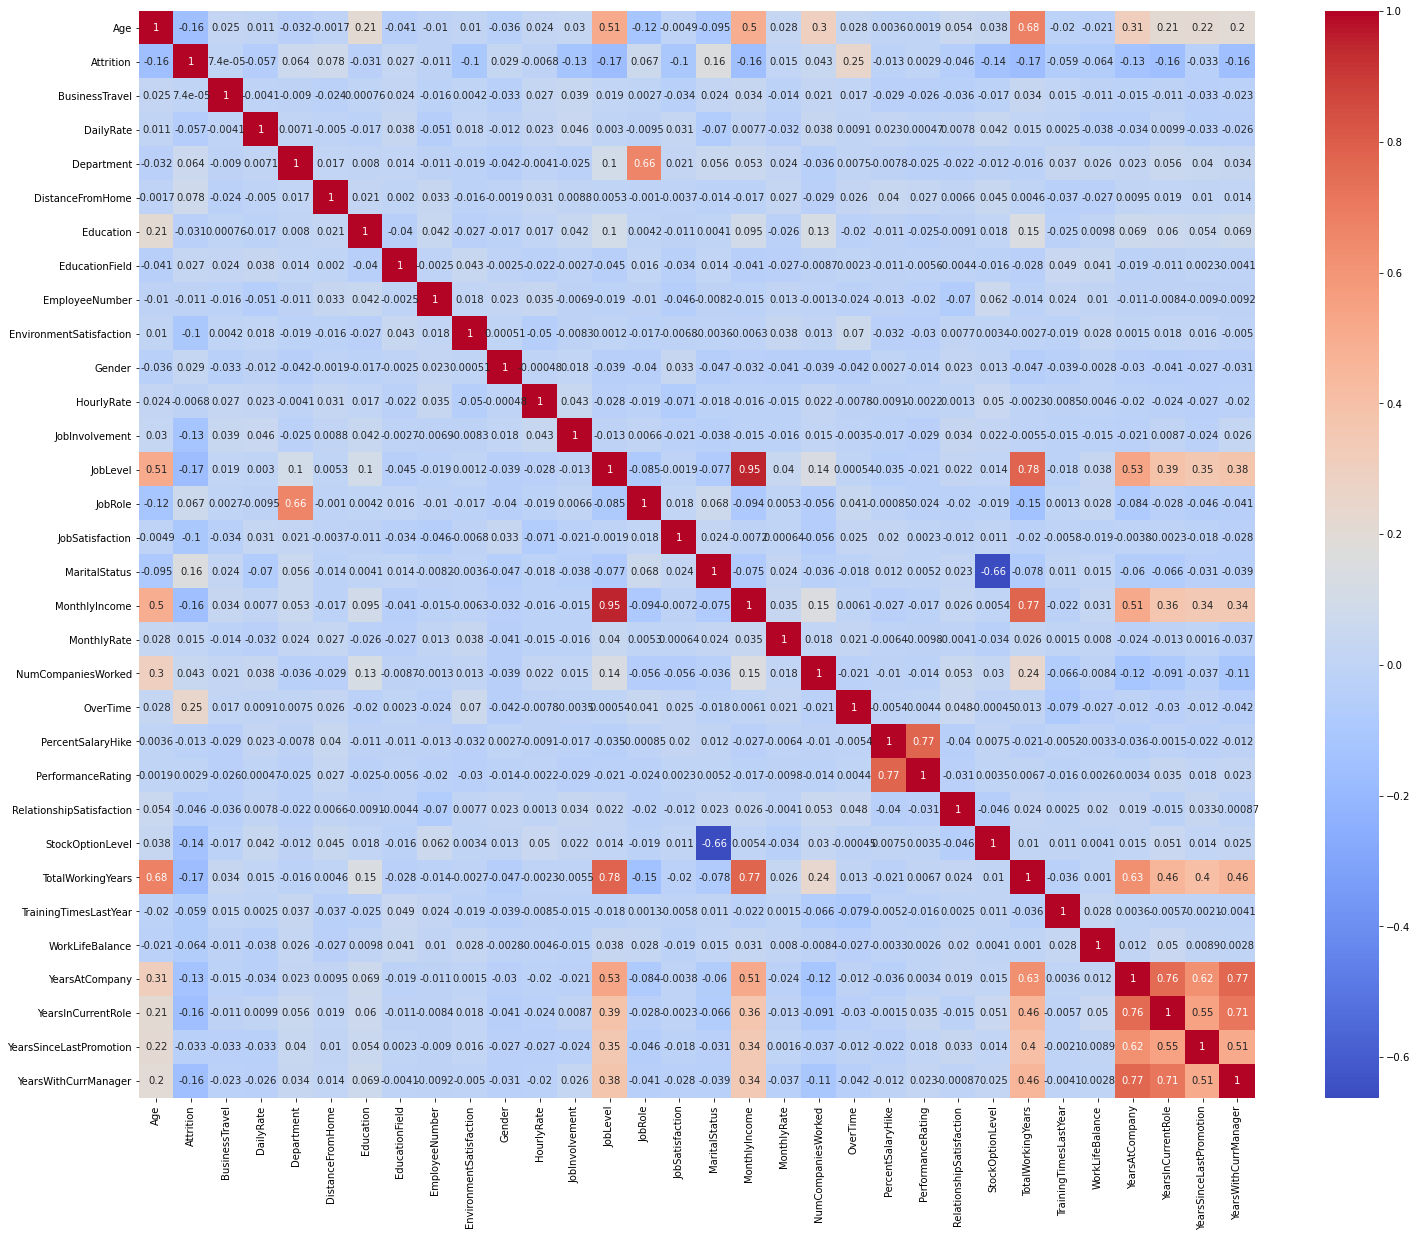

In [69]:
#Checking of correlation of features with each other
plt.figure(figsize=(25,20))
sns.heatmap(data.corr(),cmap='coolwarm',annot=True)
plt.show()

we see that 
A) Performance rating and percent salary hike is highly correlated 
B) Job Level& Monthly income has strong positive correlation. 
C) Job level & working years has strong positive correlation. 
D) Age & distance from home has negative correlation.



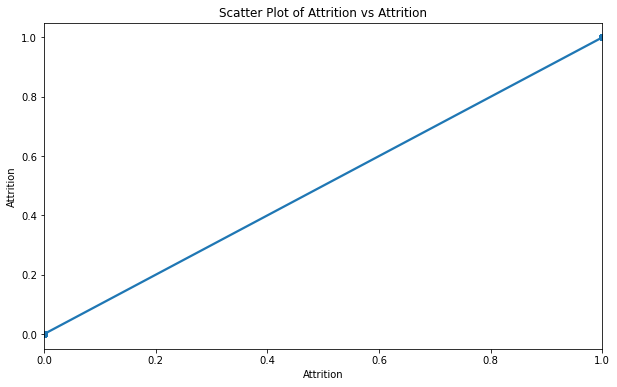

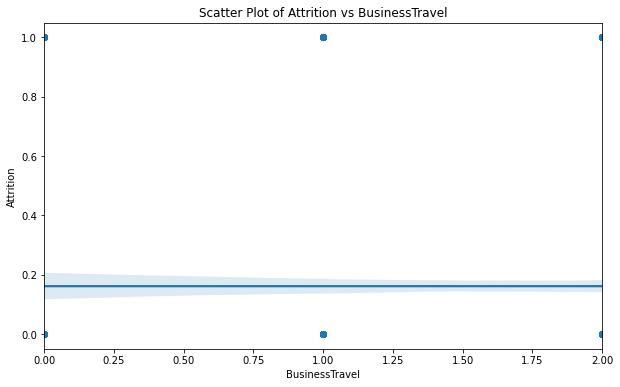

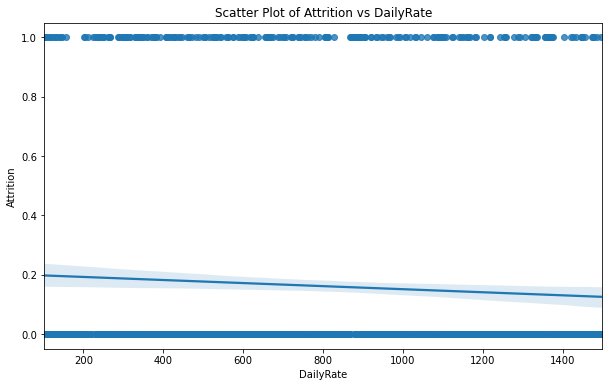

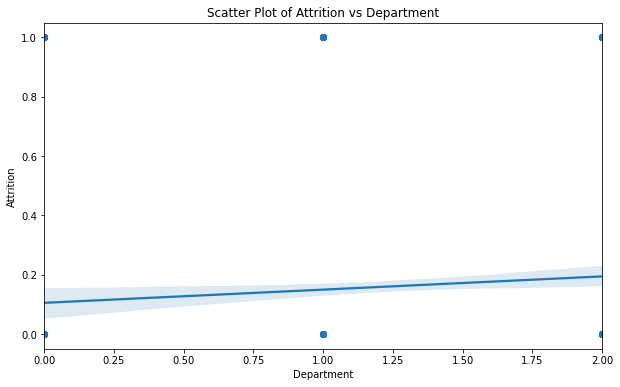

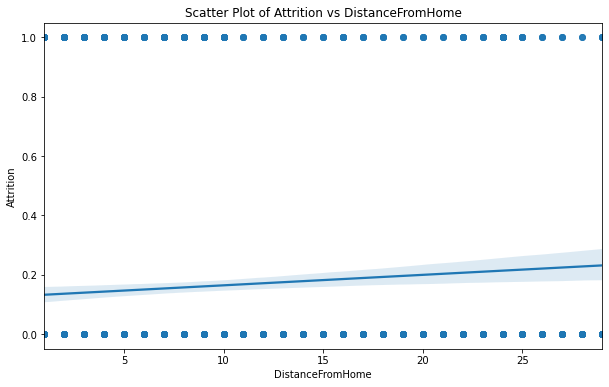

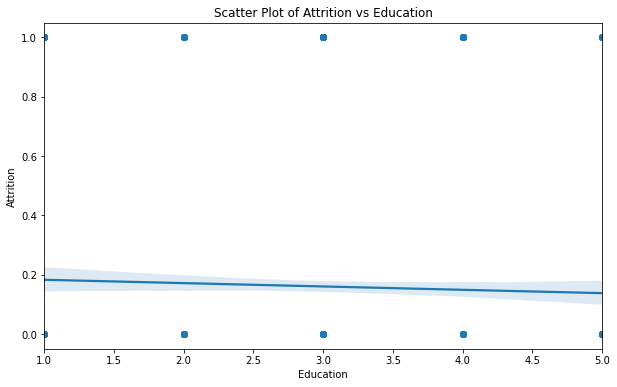

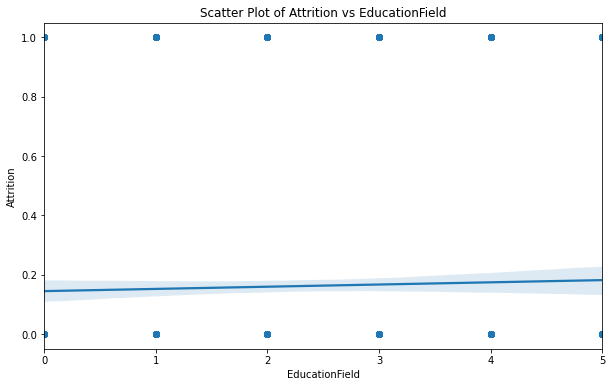

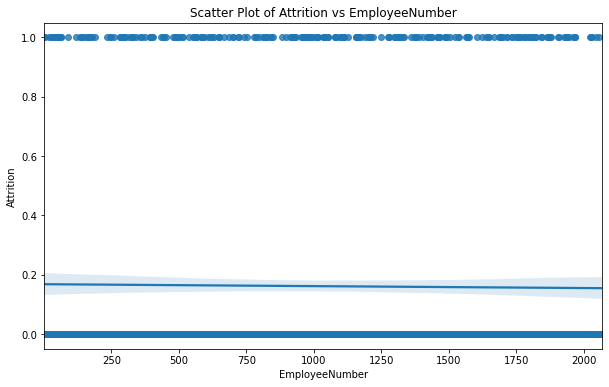

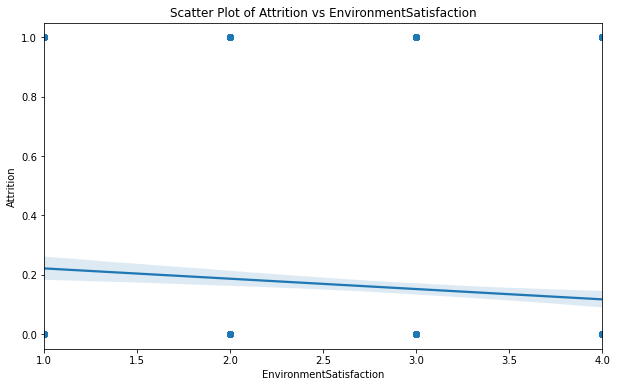

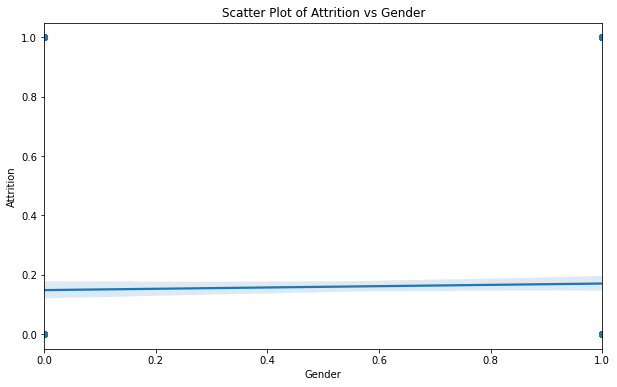

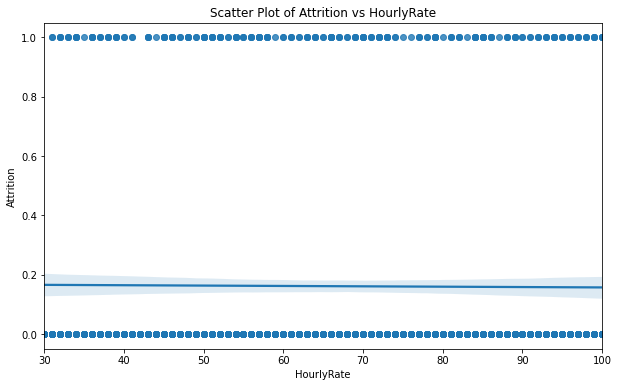

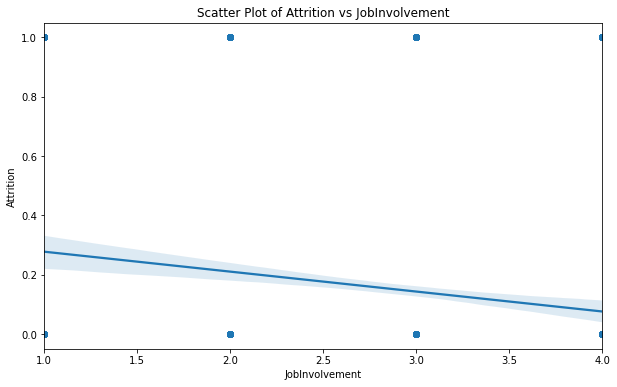

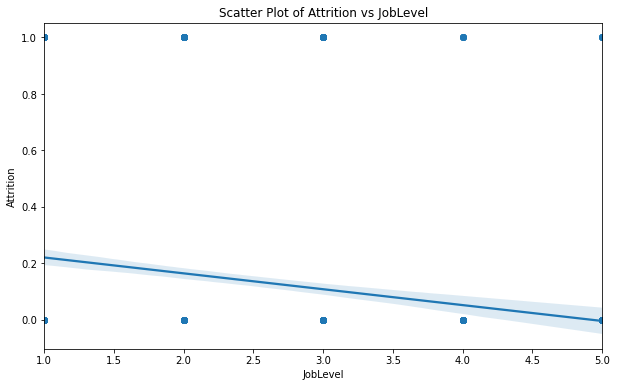

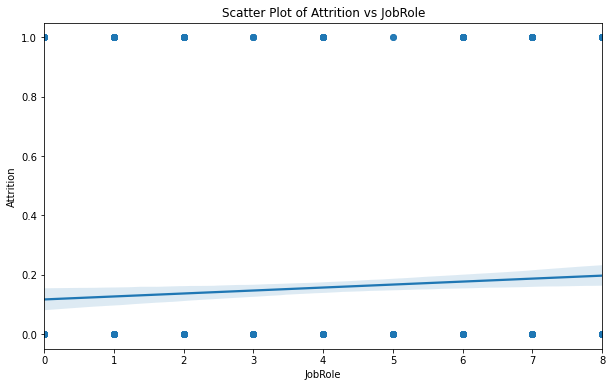

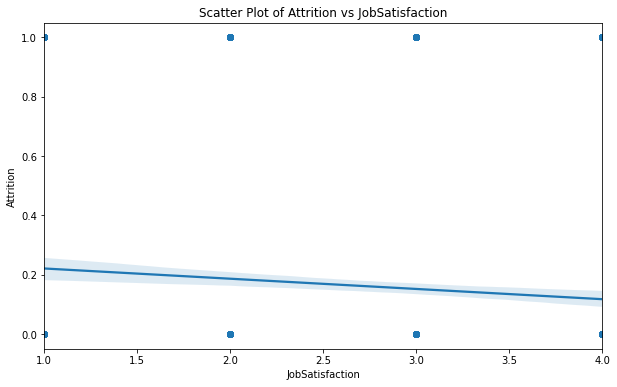

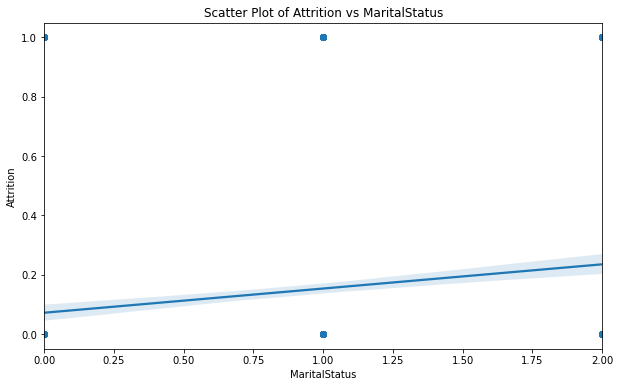

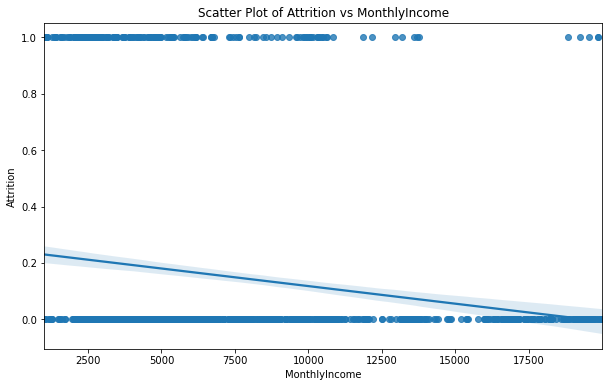

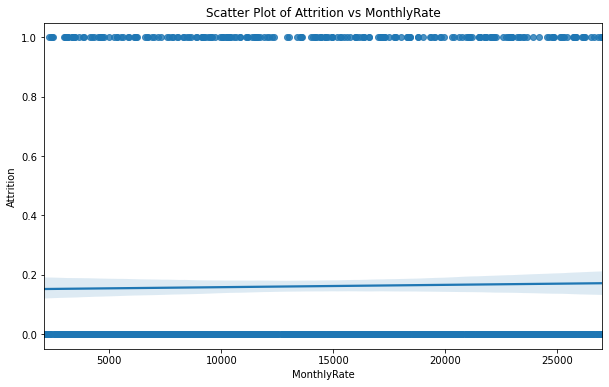

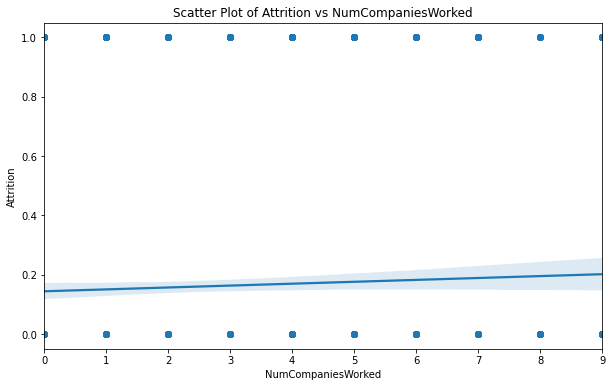

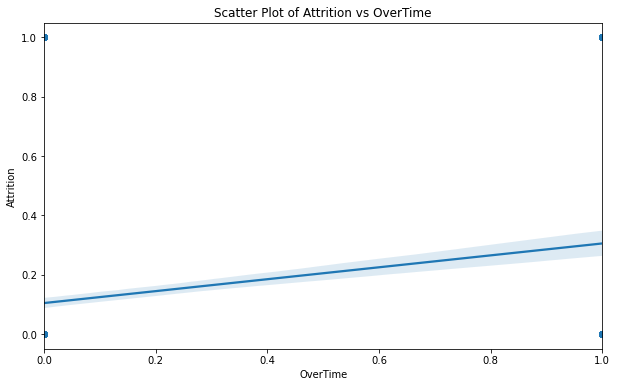

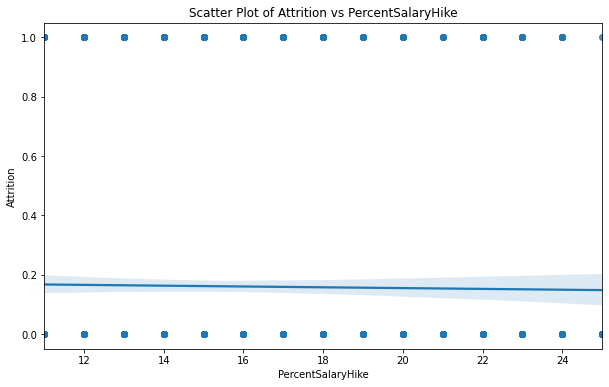

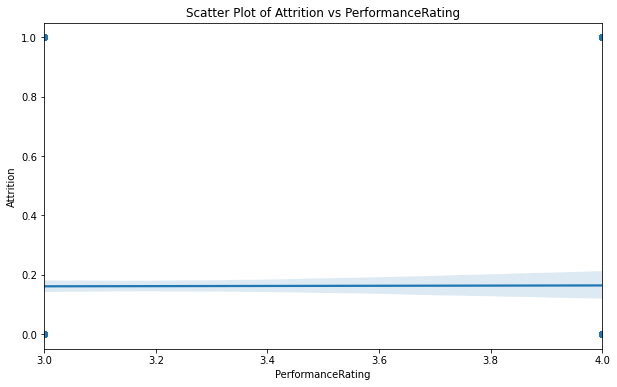

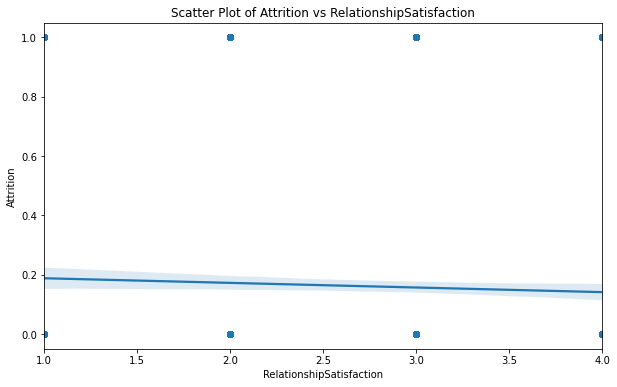

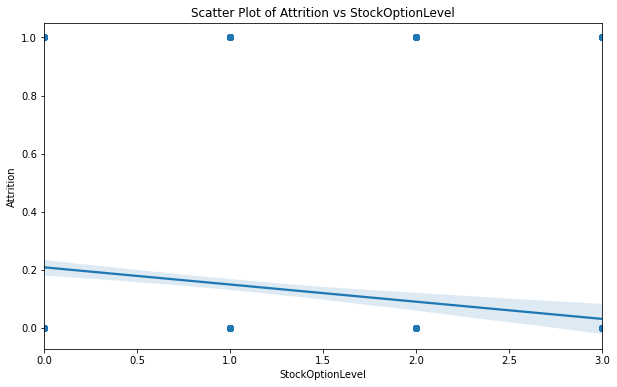

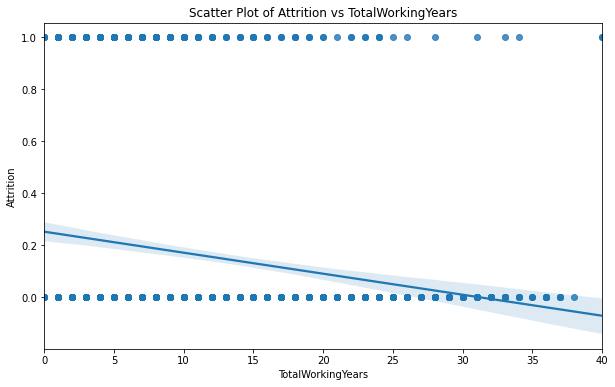

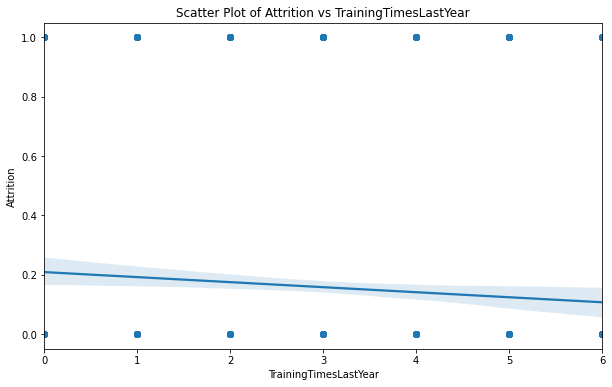

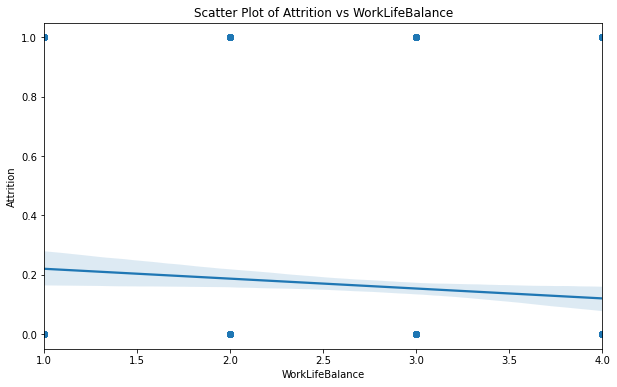

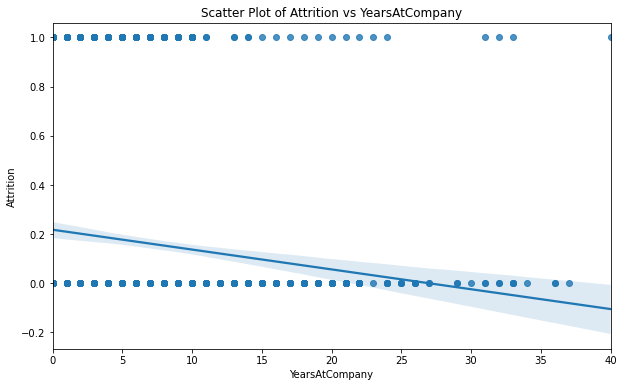

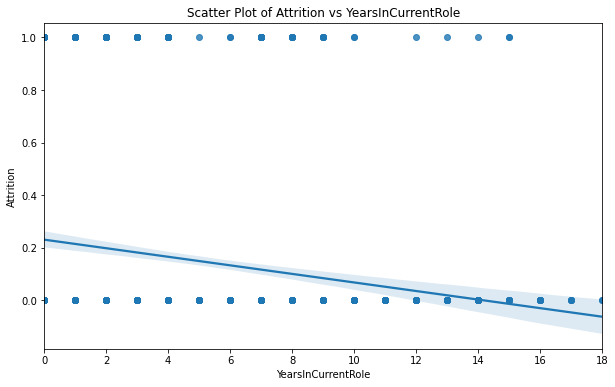

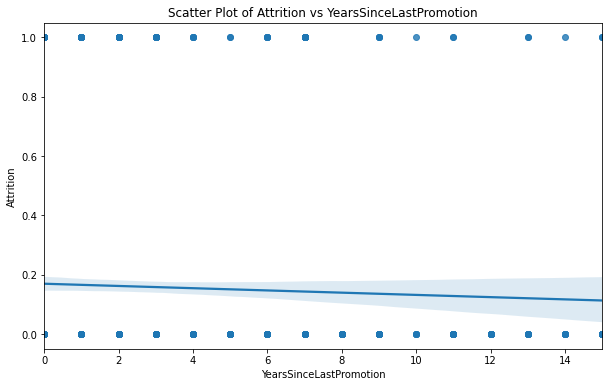

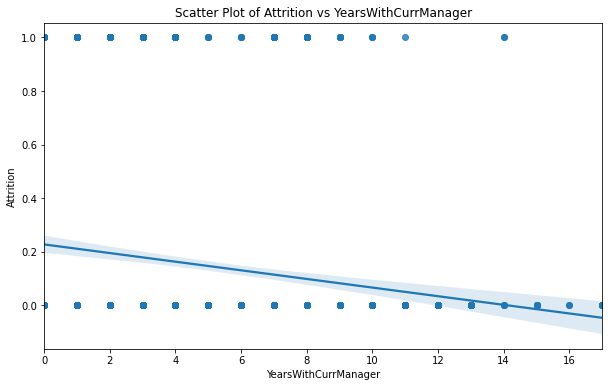

In [70]:
collist=data.columns.values
for i in range(1,len(collist)):
    plt.figure(figsize = (10,6))
    sns.regplot(data[collist[i]], data['Attrition'])
    plt.title('Scatter Plot of Attrition vs %s' %(collist[i]))
    plt.xlabel(collist[i])
    plt.ylabel('Attrition')
    plt.show()

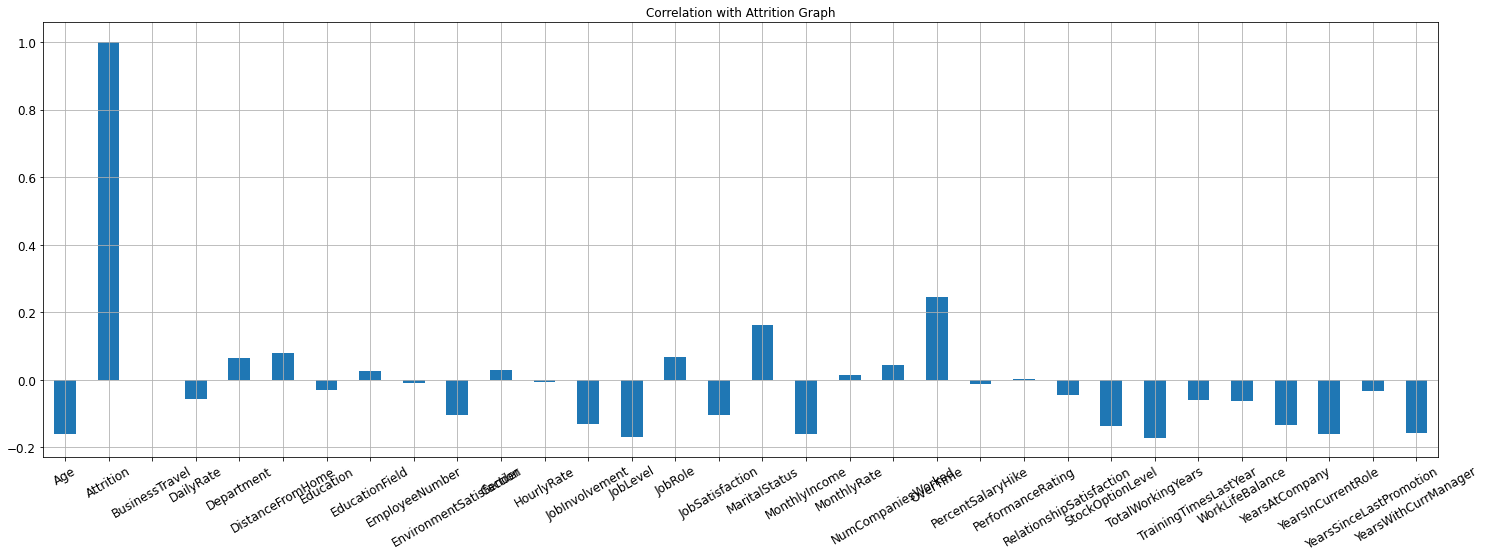

In [71]:
#Correlation with Win with respect to attributes
data.corrwith(data.Attrition).plot.bar(
        figsize = (25, 8), title = "Correlation with Attrition Graph", fontsize = 12,rot = 30, grid = True)
plt.show()

In [72]:
 #we see that only few have positive relation with Attrition and rest of feature has negative correlation with label

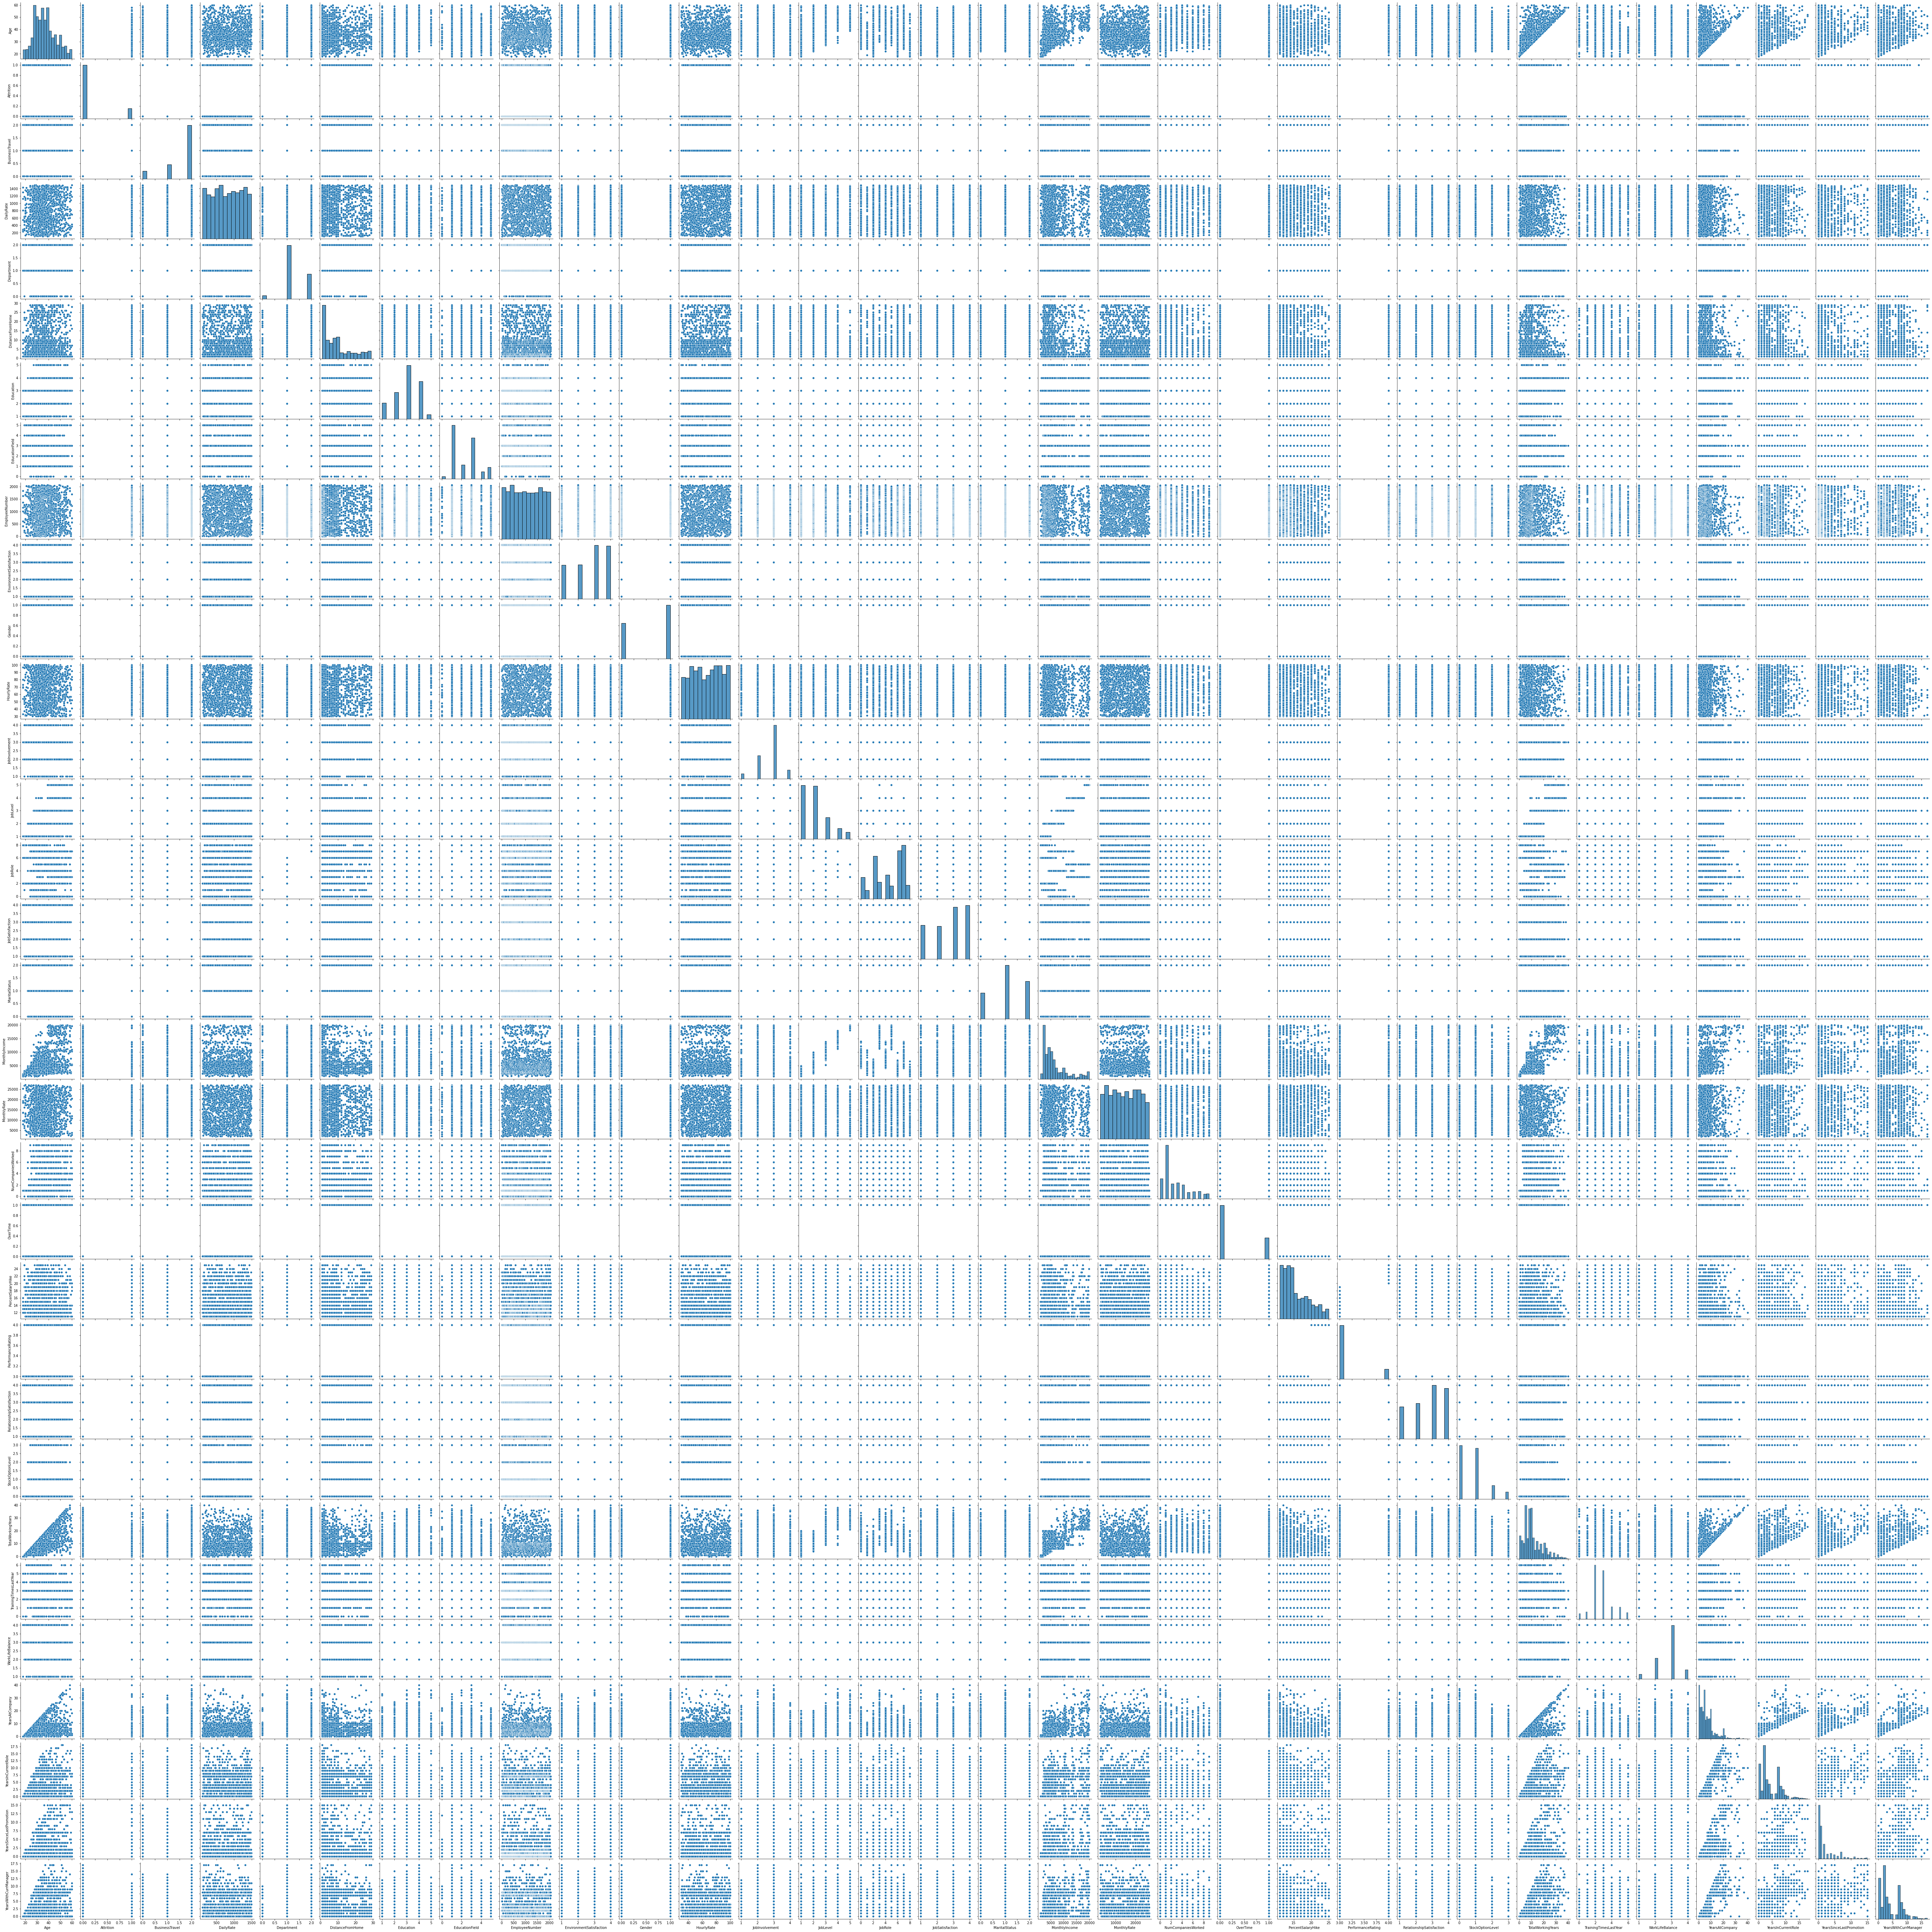

In [73]:
#Drawing Pairplot
sns.pairplot(data)
plt.show()

In [ ]:
#In pairplot we cannot understand properly

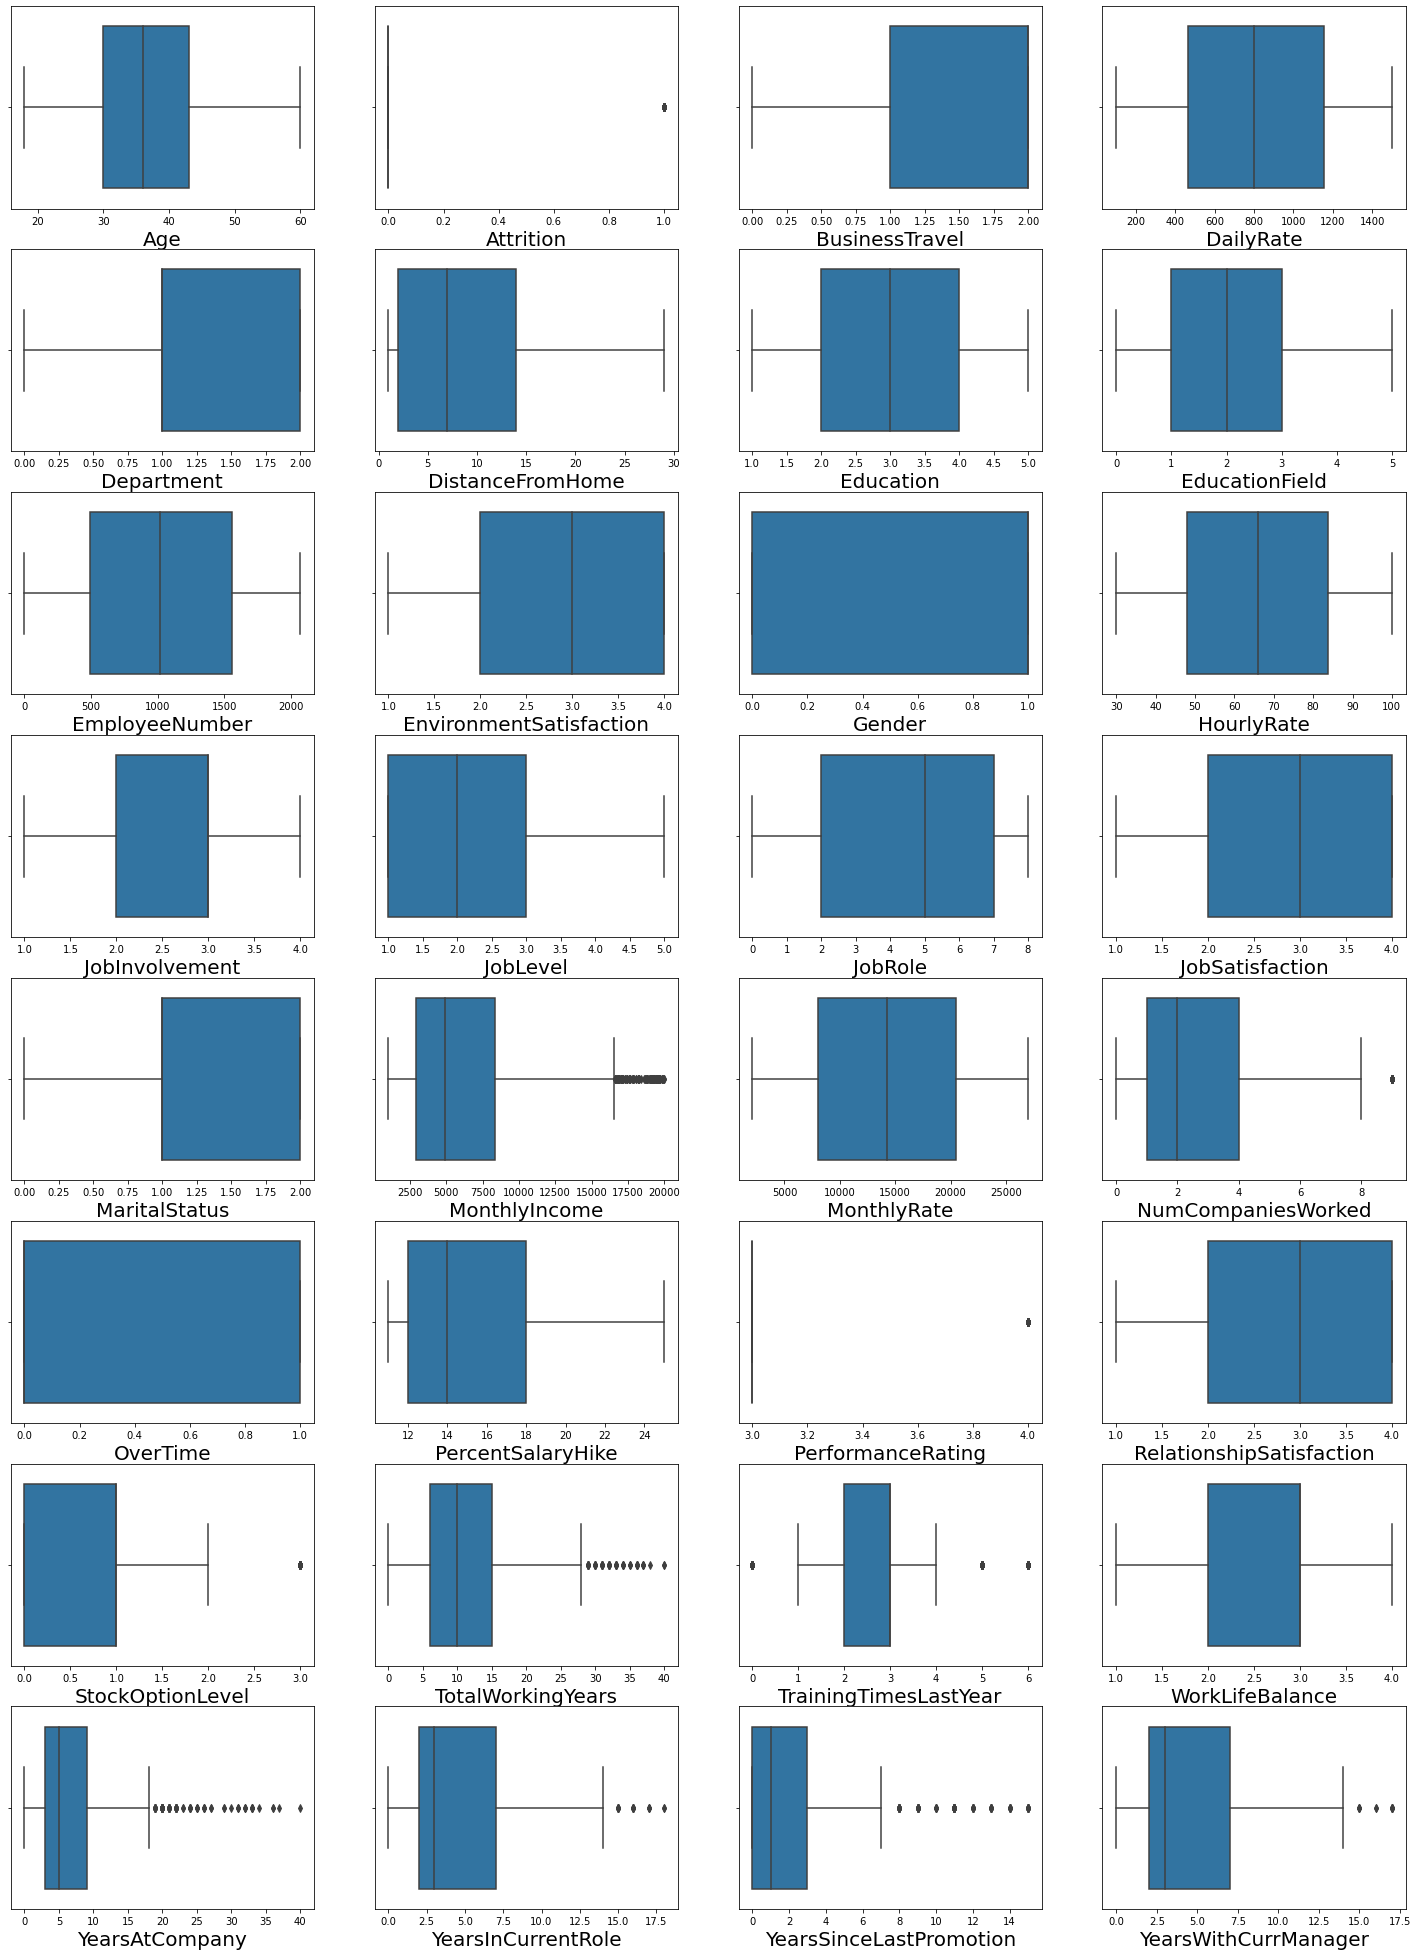

In [74]:
# let's see how data is distributed for every column
plt.figure(figsize=(25,35), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=32 :     # as there are 32 columns in the data
        ax = plt.subplot(8,4,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [75]:
data.skew()

Age                         0.413286
Attrition                   1.844366
BusinessTravel             -1.439006
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome            0.958118
Education                  -0.289681
EducationField              0.550371
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
OverTime                    0.964489
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
W

In [76]:
#Removing outliers using zscore
from scipy.stats import zscore
z = np.abs(zscore(data))
print(np.where(z>3))

(array([  28,   45,   62,   62,   63,   64,   85,   98,   98,  110,  123,
        123,  123,  126,  126,  126,  153,  178,  187,  187,  190,  190,
        218,  231,  231,  237,  237,  270,  270,  281,  326,  386,  386,
        401,  411,  425,  425,  427,  445,  466,  473,  477,  535,  561,
        561,  584,  592,  595,  595,  595,  616,  624,  635,  653,  653,
        677,  686,  701,  716,  746,  749,  752,  799,  838,  861,  861,
        875,  875,  894,  914,  914,  918,  922,  926,  926,  937,  956,
        962,  976,  976, 1008, 1024, 1043, 1078, 1078, 1086, 1086, 1093,
       1111, 1116, 1116, 1135, 1138, 1138, 1156, 1184, 1221, 1223, 1242,
       1295, 1301, 1301, 1303, 1327, 1331, 1348, 1351, 1401, 1414, 1430],
      dtype=int64), array([31, 30, 28, 30, 29, 30, 25, 25, 28, 30, 29, 30, 31, 25, 28, 30, 31,
       30, 25, 31, 28, 29, 30, 29, 31, 28, 30, 25, 28, 29, 30, 30, 31, 25,
       28, 28, 30, 30, 25, 29, 28, 28, 30, 28, 31, 30, 28, 25, 28, 30, 31,
       25, 31, 28, 30, 

In [77]:
threshold= 3
new_data =data[(z<3).all(axis = 1)]
print(data.shape)
print(new_data.shape)

(1470, 32)
(1387, 32)


In [78]:
# here 83 rows will be droped

In [79]:
#checking for how much data we lost
loss_percent=(1470-1387)/1470*100
print(loss_percent)

5.646258503401361


In [80]:
new_data.skew()

Age                         0.472280
Attrition                   1.805983
BusinessTravel             -1.426774
DailyRate                  -0.017078
Department                  0.183919
DistanceFromHome            0.954752
Education                  -0.289024
EducationField              0.544868
EmployeeNumber              0.018931
EnvironmentSatisfaction    -0.325285
Gender                     -0.417296
HourlyRate                 -0.030481
JobInvolvement             -0.501401
JobLevel                    1.126075
JobRole                    -0.386843
JobSatisfaction            -0.345612
MaritalStatus              -0.160952
MonthlyIncome               1.544770
MonthlyRate                 0.030596
NumCompaniesWorked          1.037715
OverTime                    0.954751
PercentSalaryHike           0.800592
PerformanceRating           1.931566
RelationshipSatisfaction   -0.295686
StockOptionLevel            0.962332
TotalWorkingYears           1.034487
TrainingTimesLastYear       0.577614
W

In [81]:
#The Skewness has reduce significantly after outlier removal but still there is skewness present in the variables.

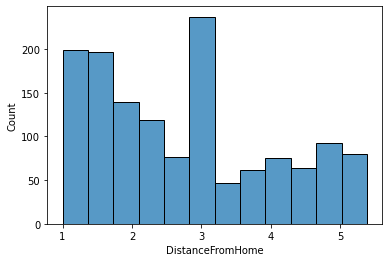

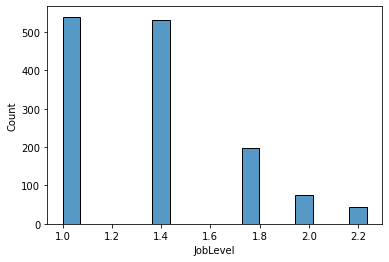

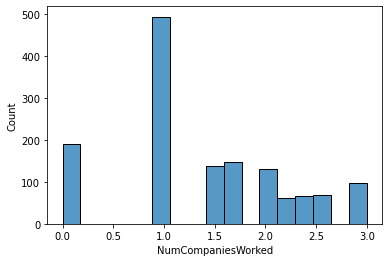

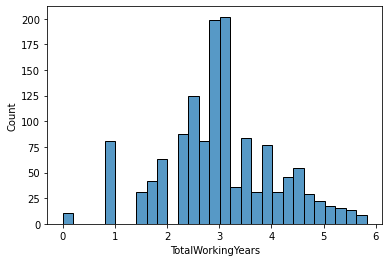

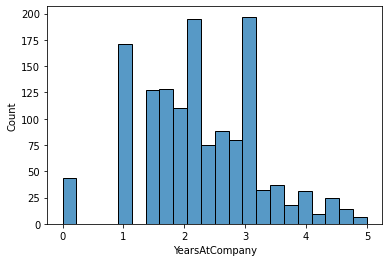

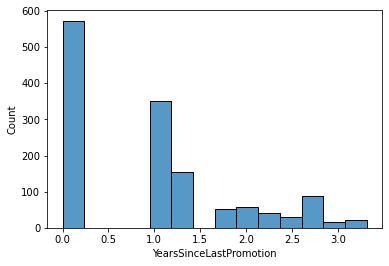

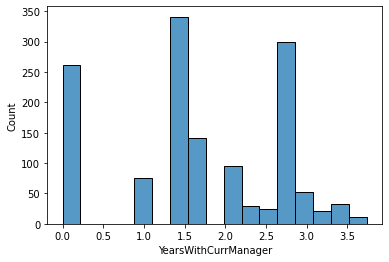

In [82]:
#Removing skewness
new_data['DistanceFromHome']=np.sqrt(new_data['DistanceFromHome'])
sns.histplot(new_data['DistanceFromHome'])
plt.show()


new_data['JobLevel']=np.sqrt(new_data['JobLevel'])
sns.histplot(new_data['JobLevel'])
plt.show()


new_data['NumCompaniesWorked']=np.sqrt(new_data['NumCompaniesWorked'])
sns.histplot(new_data['NumCompaniesWorked'])
plt.show()



new_data['TotalWorkingYears']=np.sqrt(new_data['TotalWorkingYears'])
sns.histplot(new_data['TotalWorkingYears'])
plt.show()

new_data['YearsAtCompany']=np.sqrt(new_data['YearsAtCompany'])
sns.histplot(new_data['YearsAtCompany'])
plt.show()

new_data['YearsSinceLastPromotion']=np.sqrt(new_data['YearsSinceLastPromotion'])
sns.histplot(new_data['YearsSinceLastPromotion'])
plt.show()

new_data['YearsWithCurrManager']=np.sqrt(new_data['YearsWithCurrManager'])
sns.histplot(new_data['YearsWithCurrManager'])
plt.show()

In [83]:
# Now we split feature and label
x=new_data.drop("Attrition",axis=1)
y=new_data["Attrition"]

In [84]:
# Now we deal with data imbalance

In [85]:
print('No-Attrition : 0  ----------', new_data.Attrition.value_counts()[0])
print('Attrition : 1 -------------', new_data.Attrition.value_counts()[1])

No-Attrition : 0  ---------- 1158
Attrition : 1 ------------- 229


In [86]:
# Handiling class imbalance using SMOTE
from imblearn.over_sampling import RandomOverSampler
ros  = RandomOverSampler()
X_new, y_new = ros.fit_resample(x,y)

In [87]:
print(y_new.value_counts())

1    1158
0    1158
Name: Attrition, dtype: int64


In [88]:
from sklearn.preprocessing import StandardScaler
score =StandardScaler()
X_score = score.fit_transform(X_new)

In [89]:
#Checking for best random state which give best accuracy
# To find the best random state using logistic Regressor model
maxAccu=0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(X_score,y_new,test_size=.30,random_state=i)
    mod= LogisticRegression()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print ('best accuracy is',maxAccu,'on random state',maxRS)

best accuracy is 0.814388489208633 on random state 75


In [90]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score

In [91]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

In [113]:
# Logistic model for training
from sklearn.linear_model import LogisticRegression

log = LogisticRegression()

log.fit(x_train,y_train)

log_score =log.score(x_train,y_train)

print ('Logistic training Score ==>', log_score)

log_pred = log.predict(x_test)

log_cfm=confusion_matrix(y_test,log_pred)

print("Testing accuracy :", accuracy_score(y_test, log_pred))

print(classification_report(y_test,log_pred))

cvs=cross_val_score(LogisticRegression(),x,y,cv=5).mean()
print("Cross_validation_score ----------",cvs)

Logistic training Score ==> 0.843298969072165
Testing accuracy : 0.8321342925659473
              precision    recall  f1-score   support

           0       0.83      1.00      0.91       343
           1       1.00      0.05      0.10        74

    accuracy                           0.83       417
   macro avg       0.92      0.53      0.50       417
weighted avg       0.86      0.83      0.76       417

Cross_validation_score ---------- 0.842105809936888


In [114]:
#  SVC model for training
from sklearn.svm import SVC

svc = SVC()

svc.fit(x_train,y_train)

svc_score =log.score(x_train,y_train)

print ('SVC training Score ==>', svc_score)

svc_pred = svc.predict(x_test)

svc_cfm=confusion_matrix(y_test,svc_pred)

print("Testing accuracy :", accuracy_score(y_test, svc_pred))

print(classification_report(y_test,svc_pred))

svc_cvs=cross_val_score(SVC(),x,y,cv=5).mean()
print("Cross_validation_score ----------",svc_cvs)

SVC training Score ==> 0.843298969072165
Testing accuracy : 0.8225419664268585
              precision    recall  f1-score   support

           0       0.82      1.00      0.90       343
           1       0.00      0.00      0.00        74

    accuracy                           0.82       417
   macro avg       0.41      0.50      0.45       417
weighted avg       0.68      0.82      0.74       417

Cross_validation_score ---------- 0.8348959821312626


In [115]:
# Knn Classifier
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(x_train,y_train)

knn_score = knn.score(x_train,y_train)

print ('KNeighborsClassifier training Score ==>', knn_score)

# Importing test set for prediction

knn_pred = knn.predict(x_test)

knn_cfm=confusion_matrix(y_test,knn_pred)

print("Testing accuracy :", accuracy_score(y_test,knn_pred))

print(classification_report(y_test,knn_pred))

knn_cvs = cross_val_score(KNeighborsClassifier(),x,y,cv=5).mean()

print("Cross_validation_score ----------",knn_cvs)

KNeighborsClassifier training Score ==> 0.856701030927835
Testing accuracy : 0.8033573141486811
              precision    recall  f1-score   support

           0       0.83      0.96      0.89       343
           1       0.28      0.07      0.11        74

    accuracy                           0.80       417
   macro avg       0.55      0.51      0.50       417
weighted avg       0.73      0.80      0.75       417

Cross_validation_score ---------- 0.815427369295899


In [116]:
# AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier

adc=AdaBoostClassifier()

adc.fit(x_train, y_train)

adc_score = (adc.score(x_train, y_train))

print('AdaBoostClassifier training Score ==>',adc_score)

# Importing test set for prediction

adc_pred = adc.predict(x_test)

adc_cfm=confusion_matrix(y_test,adc_pred)

print("Testing accuracy :", accuracy_score(y_test,adc_pred))

print(classification_report(y_test,adc_pred))

adc_cvs = cross_val_score(AdaBoostClassifier(),x,y,cv=5).mean()

print("Cross_validation_score ----------",adc_cvs)

AdaBoostClassifier training Score ==> 0.9061855670103093
Testing accuracy : 0.8537170263788969
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       343
           1       0.69      0.32      0.44        74

    accuracy                           0.85       417
   macro avg       0.78      0.65      0.68       417
weighted avg       0.84      0.85      0.83       417

Cross_validation_score ---------- 0.8500350622029451


In [117]:
# DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()

decision_tree.fit(x_train, y_train)

dt_score = (decision_tree.score(x_train, y_train))

print('Decision Tree training Score ==>',dt_score)

# Importing test set for prediction

dt_pred = decision_tree.predict(x_test)

dt_cfm=confusion_matrix(y_test,dt_pred)

print("Testing accuracy :", accuracy_score(y_test,dt_pred))

print(classification_report(y_test,dt_pred))

dt_cvs = cross_val_score(DecisionTreeClassifier(),x,y,cv=5).mean()

print("Cross_validation_score ----------",dt_cvs)

Decision Tree training Score ==> 1.0
Testing accuracy : 0.7769784172661871
              precision    recall  f1-score   support

           0       0.87      0.86      0.86       343
           1       0.38      0.39      0.38        74

    accuracy                           0.78       417
   macro avg       0.62      0.63      0.62       417
weighted avg       0.78      0.78      0.78       417

Cross_validation_score ---------- 0.7757681219645223


In [118]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

rfc.fit(x_train, y_train)

rfc_score = (rfc.score(x_train, y_train))

print('Decision Tree training Score ==>',rfc_score)

# Importing test set for prediction

rfc_pred = rfc.predict(x_test)

print("Testing accuracy :", accuracy_score(y_test,rfc_pred))

rfc_cfm=confusion_matrix(y_test,dt_pred)

print(classification_report(y_test,rfc_pred))

rfc_cvs = cross_val_score(rfc,x,y,cv=5).mean()

print("Cross_validation_score ----------",rfc_cvs)

Decision Tree training Score ==> 1.0
Testing accuracy : 0.8489208633093526
              precision    recall  f1-score   support

           0       0.85      0.99      0.92       343
           1       0.87      0.18      0.29        74

    accuracy                           0.85       417
   macro avg       0.86      0.58      0.60       417
weighted avg       0.85      0.85      0.80       417

Cross_validation_score ---------- 0.855798249487053


In [ ]:
# we see that RandomForestClassifier give good accuracy for 85% before and after crossvalidation

In [121]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score,roc_auc_score,plot_roc_curve,roc_curve,r2_score


In [123]:
#Now we find ROC, AUC score
# LogisticRegression
roc_auc_score(y_test, log.predict(x_test))

0.527027027027027

In [131]:
# SVC Classifier
roc_auc_score(y_test,svc.predict(x_test))

0.5

In [132]:
# AdaBoostClassifier
roc_auc_score(y_test,adc.predict(x_test))

0.6461271767394217

In [125]:
# DecisionTreeClassifier
roc_auc_score(y_test,decision_tree.predict(x_test))

0.6259751004648964

In [126]:
# RandomForestClassifier
roc_auc_score(y_test,svc.predict(x_test))

0.5

In [127]:
#Let's check ROC, AUC Curve for the fitted model

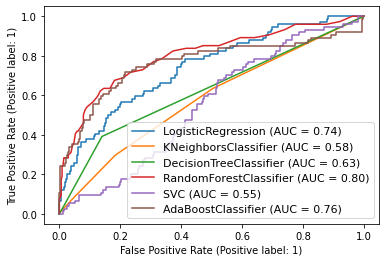

In [133]:
disp = plot_roc_curve(log, x_test, y_test)
plot_roc_curve(knn, x_test, y_test, ax = disp.ax_) # ax_ = Axes with confusion matrix
plot_roc_curve(decision_tree, x_test, y_test, ax = disp.ax_)
plot_roc_curve(rfc, x_test, y_test, ax = disp.ax_)
plot_roc_curve(svc, x_test, y_test, ax = disp.ax_)
plot_roc_curve(adc, x_test, y_test, ax = disp.ax_)

plt.legend(prop = {'size':11}, loc = 'lower right')
plt.show()

In [ ]:
#we see that RandomForestClassifier is best model and also give highest accuracy 85

In [ ]:
# Hyperparameter tunning the machine Learning Model

In [134]:
params={'n_estimators':[13,15],
        'criterion':['entropy','gini'],
        'max_depth':[10],
        'min_samples_split':[10,11],
        'min_samples_leaf':[5,6]}

In [135]:
grid_search = GridSearchCV(estimator = RandomForestClassifier(),param_grid = params)

In [136]:
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy', 'gini'], 'max_depth': [10],
                         'min_samples_leaf': [5, 6],
                         'min_samples_split': [10, 11],
                         'n_estimators': [13, 15]})

In [137]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'min_samples_leaf': 5,
 'min_samples_split': 11,
 'n_estimators': 15}

In [138]:
rf=grid_search.best_estimator_

In [139]:
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=11,
                       n_estimators=15)

In [140]:
rf.score(x_test,y_test)

0.8369304556354916

In [142]:
y_predict=rf.predict(x_test)
cfm = confusion_matrix(y_test,y_predict)
print(classification_report(y_test,y_predict, digits=2))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91       343
           1       0.71      0.14      0.23        74

    accuracy                           0.84       417
   macro avg       0.78      0.56      0.57       417
weighted avg       0.82      0.84      0.79       417



In [ ]:
#we conclude that RandomForestClassifier is best model and also give highest accuracy 85

In [144]:
#Saving the model
import joblib 
joblib.dump(rf,"HR Analytics Project.csv")

['HR Analytics Project.csv']